## import library and load Data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('Mall_Customers.csv')

print(f"sapmle : {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"\n Column names:\n{df.columns.tolist()}")
print(f"Missing values: {df.isnull().sum()}")
print(f"Data type: {df.dtypes}")

sapmle : 200
Number of features: 5

 Column names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Missing values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Data type: CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


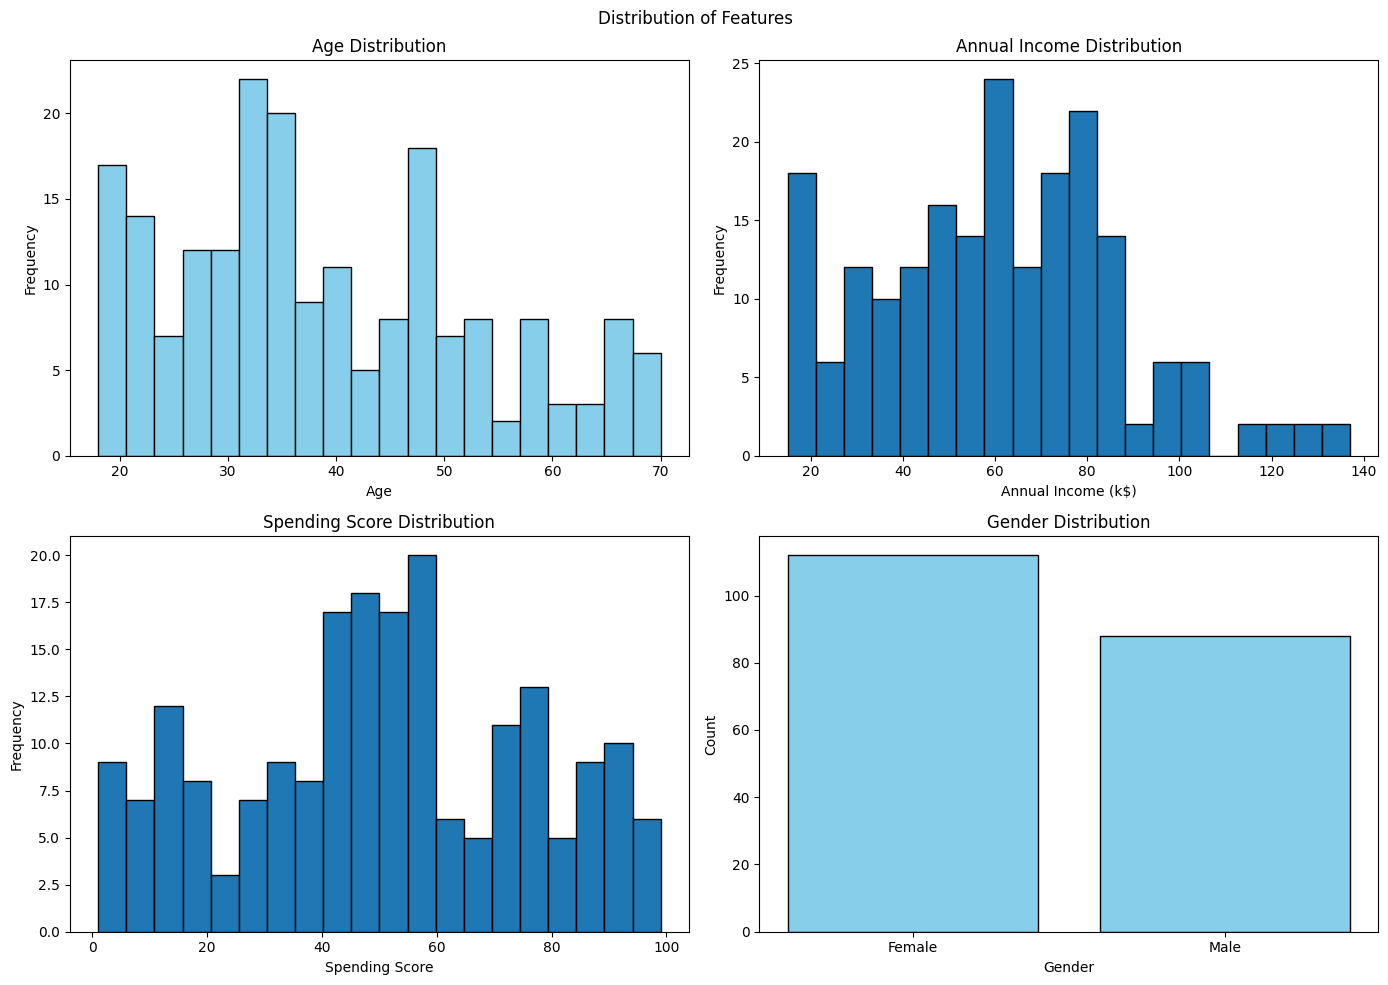

In [64]:
# Show data distribution
fig, axes = plt.subplots(2,2, figsize=(14,10))
fig.suptitle('Distribution of Features')

# Age
axes[0, 0].hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Annual Income
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black')
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].set_xlabel('Spending Score')
axes[1, 0].set_ylabel('Frequency')

# Gender
gender_counts = df['Gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, edgecolor='black', color='skyblue')
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('data_distribution.png', dpi=300, bbox_inches='tight')
plt.savefig('data_distribution.pdf', bbox_inches='tight')
plt.show()

## Preprocessing and PCA

In [65]:
# Convert Gender to number
df['Gender_encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Select numerical features for clustering
features = ['Gender_encoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply 2D PCA
pca = PCA(n_components=2, random_state=33)
X_pca = pca.fit_transform(X_scaled)

print(f" Proportion of variance explained by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f" Proportion of variance explained by PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f" Total variance retained: {pca.explained_variance_ratio_.sum():.4f}")

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

 Proportion of variance explained by PC1: 0.3369
 Proportion of variance explained by PC2: 0.2623
 Total variance retained: 0.5992


### Display data in PCA space

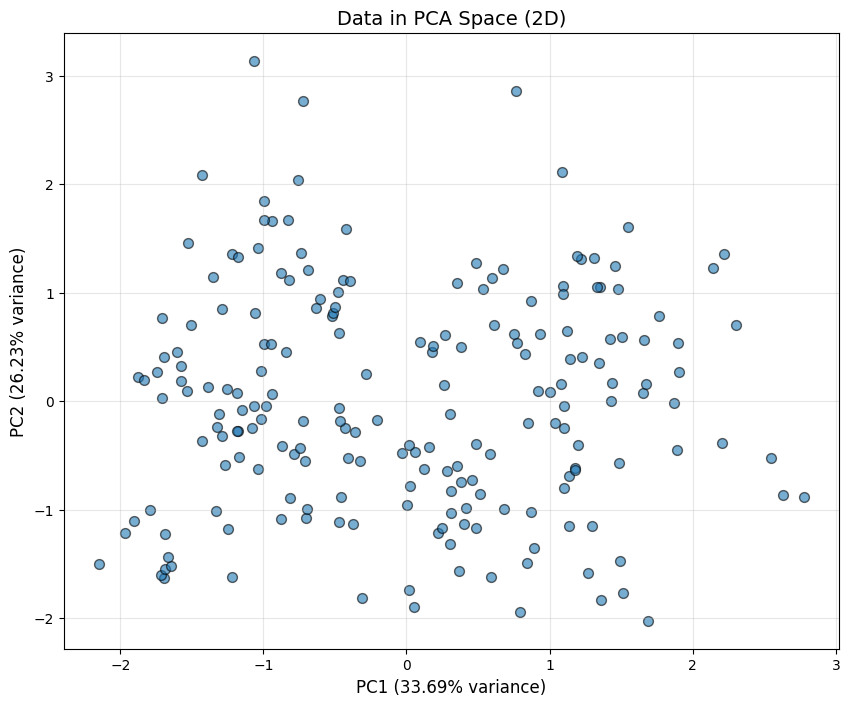

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=50, edgecolors='k')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Data in PCA Space (2D)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('pca_original.png', dpi=300, bbox_inches='tight')
plt.savefig('pca_original.pdf', bbox_inches='tight')
plt.show()

## KMeans and evaluation

In [67]:
# k list
k_values = range(2, 11)
inertias = []
silhouettes = []

In [68]:
# Train KMeans for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=33, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, labels)
    
    inertias.append(inertia)
    silhouettes.append(silhouette)
    
    print(f"K={k:2d} | Inertia: {inertia:8.2f} | Silhouette: {silhouette:.4f}")

best_k_idx = np.argmax(silhouettes)
best_k = list(k_values)[best_k_idx]
print(f"\nBest K based on silhouette: {best_k} (Silhouette = {silhouettes[best_k_idx]:.4f})")

K= 2 | Inertia:   588.80 | Silhouette: 0.2518
K= 3 | Inertia:   476.86 | Silhouette: 0.2619
K= 4 | Inertia:   386.71 | Silhouette: 0.3016
K= 5 | Inertia:   326.42 | Silhouette: 0.3161
K= 6 | Inertia:   275.15 | Silhouette: 0.3248
K= 7 | Inertia:   236.81 | Silhouette: 0.3558
K= 8 | Inertia:   199.78 | Silhouette: 0.3873
K= 9 | Inertia:   174.25 | Silhouette: 0.4024
K=10 | Inertia:   152.03 | Silhouette: 0.4208

Best K based on silhouette: 10 (Silhouette = 0.4208)


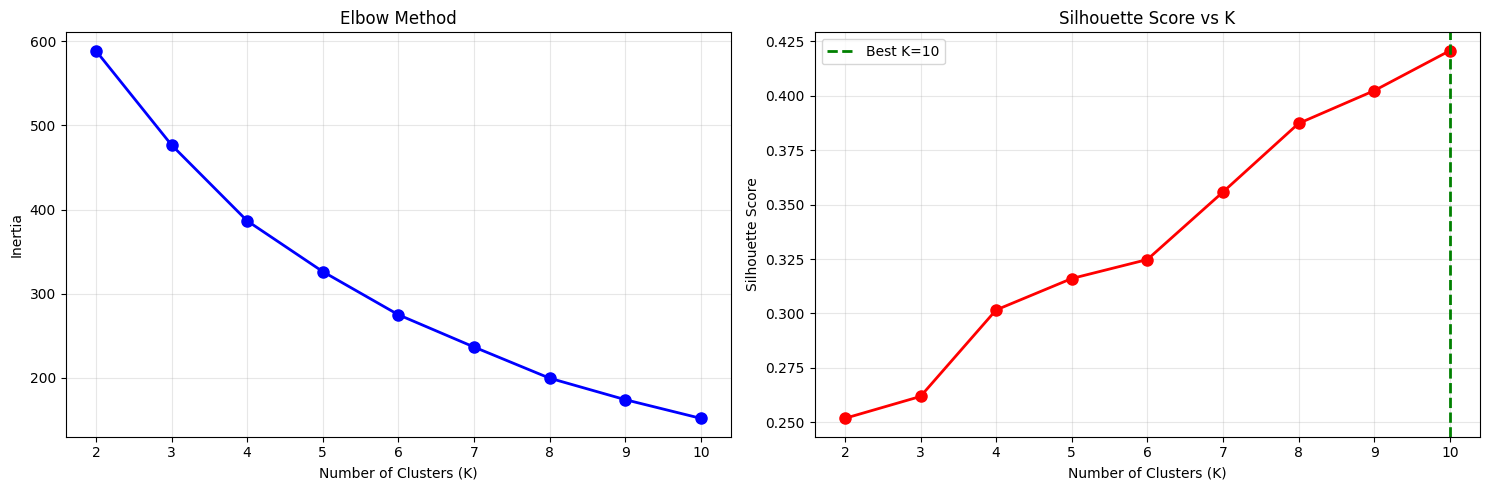

In [69]:
# Elbow and Silhouette Chart
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method
axes[0].plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_values)

# Silhouette Score
axes[1].plot(k_values, silhouettes, 'ro-', linewidth=2, markersize=8)
axes[1].axvline(x=best_k, color='green', linestyle='--', linewidth=2, label=f'Best K={best_k}')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs K')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_values)
axes[1].legend()

plt.tight_layout()
plt.savefig('kmeans_evaluation.png', dpi=300, bbox_inches='tight')
plt.savefig('kmeans_evaluation.pdf', dpi=300, bbox_inches='tight')
plt.show()

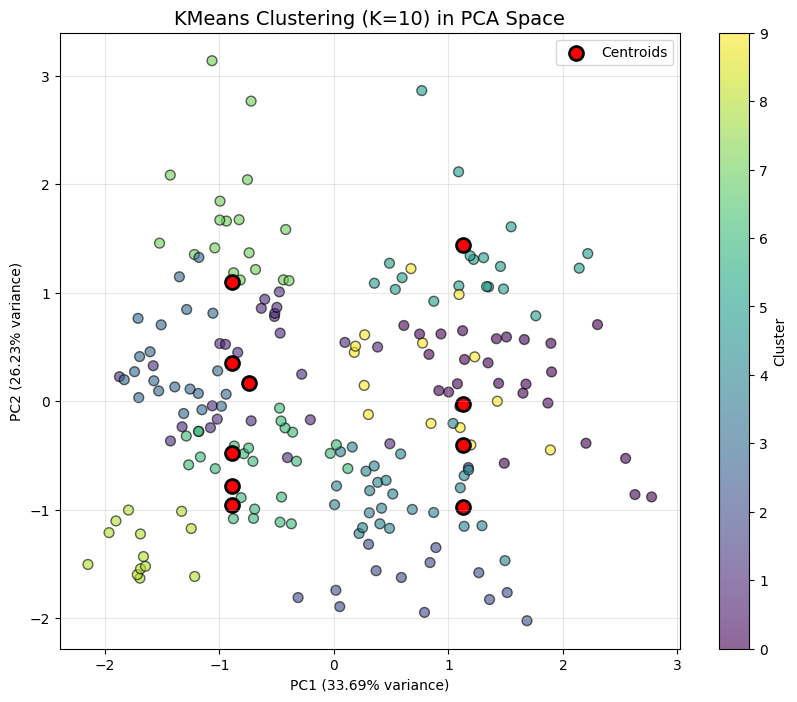

In [70]:
# نمایش نتایج KMeans با بهترین K
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_best = kmeans_best.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_best, 
                     cmap='viridis', alpha=0.6, s=50, edgecolor='k')
plt.scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1],
           c='red', marker='o', s=100, edgecolor='black', linewidth=2, label='Centroids')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title(f'KMeans Clustering (K={best_k}) in PCA Space', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('kmeans_best_pca.png', dpi=300, bbox_inches='tight')
plt.savefig('kmeans_best_pca.pdf', bbox_inches='tight')
plt.show()


## Agglomerative Clustering

In [71]:
# linkages
linkages = ['single', 'complete', 'average', 'ward']

agg_results = {}

n_clusters_range = range(2, 11)

# For each linkage, we find the best number of clusters

for linkage in linkages:
    print(f"Linkage: {linkage}")
    
    best_silhouette = -1
    best_n_clusters = 2
    best_labels = None
    
    silhouette_scores = []
    
    for n_clusters in n_clusters_range:
        agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agg.fit_predict(X_scaled)
        
        silhouette = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette)
        
        print(f"  n_clusters={n_clusters:2d} | Silhouette: {silhouette:.4f}")
        
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_n_clusters = n_clusters
            best_labels = labels
    
    agg_results[linkage] = {
        'best_n_clusters': best_n_clusters,
        'best_silhouette': best_silhouette,
        'best_labels': best_labels,
        'all_silhouettes': silhouette_scores
    }
    
    print(f"\n Best number of clusters: {best_n_clusters} (Silhouette: {best_silhouette:.4f})")

Linkage: single
  n_clusters= 2 | Silhouette: 0.2776
  n_clusters= 3 | Silhouette: 0.2175
  n_clusters= 4 | Silhouette: 0.1533
  n_clusters= 5 | Silhouette: 0.1218
  n_clusters= 6 | Silhouette: 0.0859
  n_clusters= 7 | Silhouette: 0.0769
  n_clusters= 8 | Silhouette: 0.0624
  n_clusters= 9 | Silhouette: 0.0403
  n_clusters=10 | Silhouette: -0.0004

 Best number of clusters: 2 (Silhouette: 0.2776)
Linkage: complete
  n_clusters= 2 | Silhouette: 0.1726
  n_clusters= 3 | Silhouette: 0.2079
  n_clusters= 4 | Silhouette: 0.2651
  n_clusters= 5 | Silhouette: 0.2433
  n_clusters= 6 | Silhouette: 0.2839
  n_clusters= 7 | Silhouette: 0.3050
  n_clusters= 8 | Silhouette: 0.2988
  n_clusters= 9 | Silhouette: 0.2980
  n_clusters=10 | Silhouette: 0.3526

 Best number of clusters: 10 (Silhouette: 0.3526)
Linkage: average
  n_clusters= 2 | Silhouette: 0.2776
  n_clusters= 3 | Silhouette: 0.2779
  n_clusters= 4 | Silhouette: 0.2664
  n_clusters= 5 | Silhouette: 0.3075
  n_clusters= 6 | Silhouette: 0.3

In [72]:
best_linkage = []
for linkage in linkages:
    result = agg_results[linkage]
    best_linkage.append(linkage)
    print(f"{linkage:10s} | Best K: {result['best_n_clusters']:2d} | Silhouette: {result['best_silhouette']:.4f}")

single     | Best K:  2 | Silhouette: 0.2776
complete   | Best K: 10 | Silhouette: 0.3526
average    | Best K:  8 | Silhouette: 0.3813
ward       | Best K: 10 | Silhouette: 0.4176


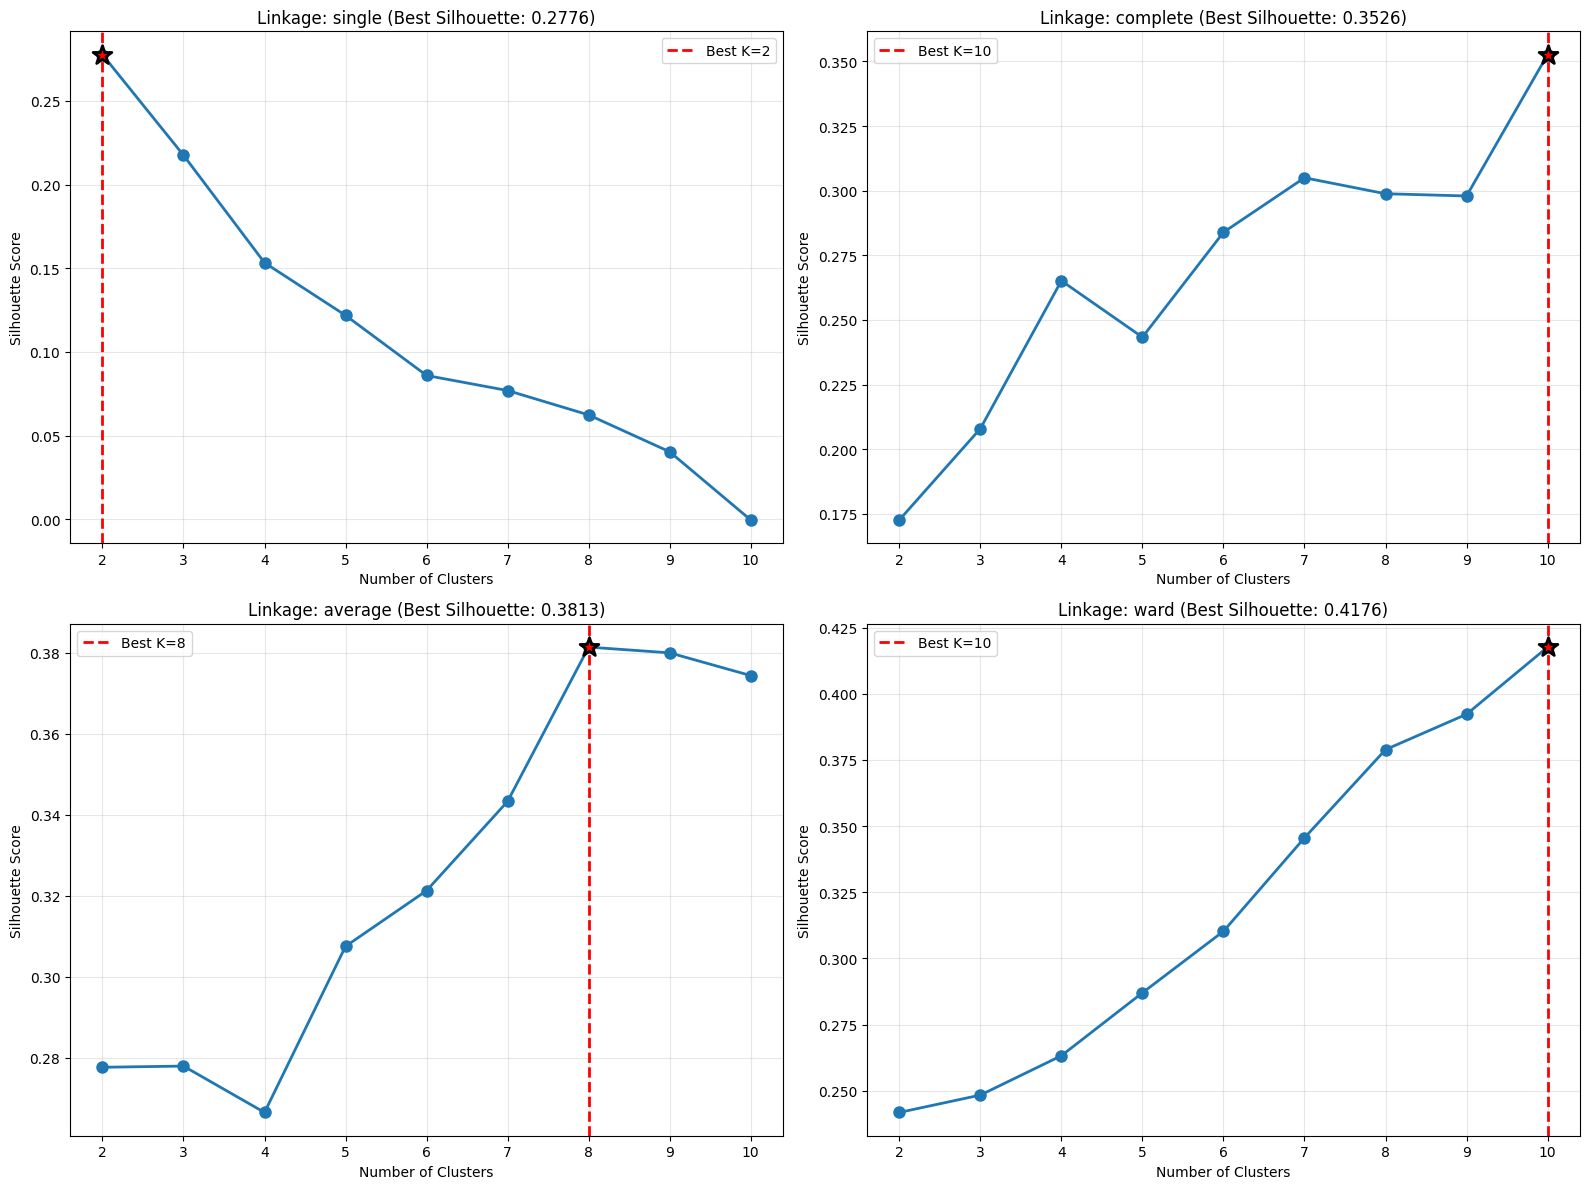

In [73]:
# Silhouette comparison chart for all linkages
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, linkage in enumerate(linkages):
    axes[idx].plot(n_clusters_range, agg_results[linkage]['all_silhouettes'], 
                   'o-', linewidth=2, markersize=8)
    
    best_n = agg_results[linkage]['best_n_clusters']
    best_score = agg_results[linkage]['best_silhouette']
    
    axes[idx].axvline(x=best_n, color='red', linestyle='--', linewidth=2, 
                      label=f'Best K={best_n}')
    axes[idx].scatter([best_n], [best_score], color='red', s=200, 
                      marker='*', edgecolor='black', linewidth=2, zorder=5)
    
    axes[idx].set_xlabel('Number of Clusters')
    axes[idx].set_ylabel('Silhouette Score')
    axes[idx].set_title(f'Linkage: {linkage} (Best Silhouette: {best_score:.4f})')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks(n_clusters_range)
    axes[idx].legend()

plt.tight_layout()
plt.savefig('agglomerative_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('agglomerative_comparison.pdf', bbox_inches='tight')
plt.show()


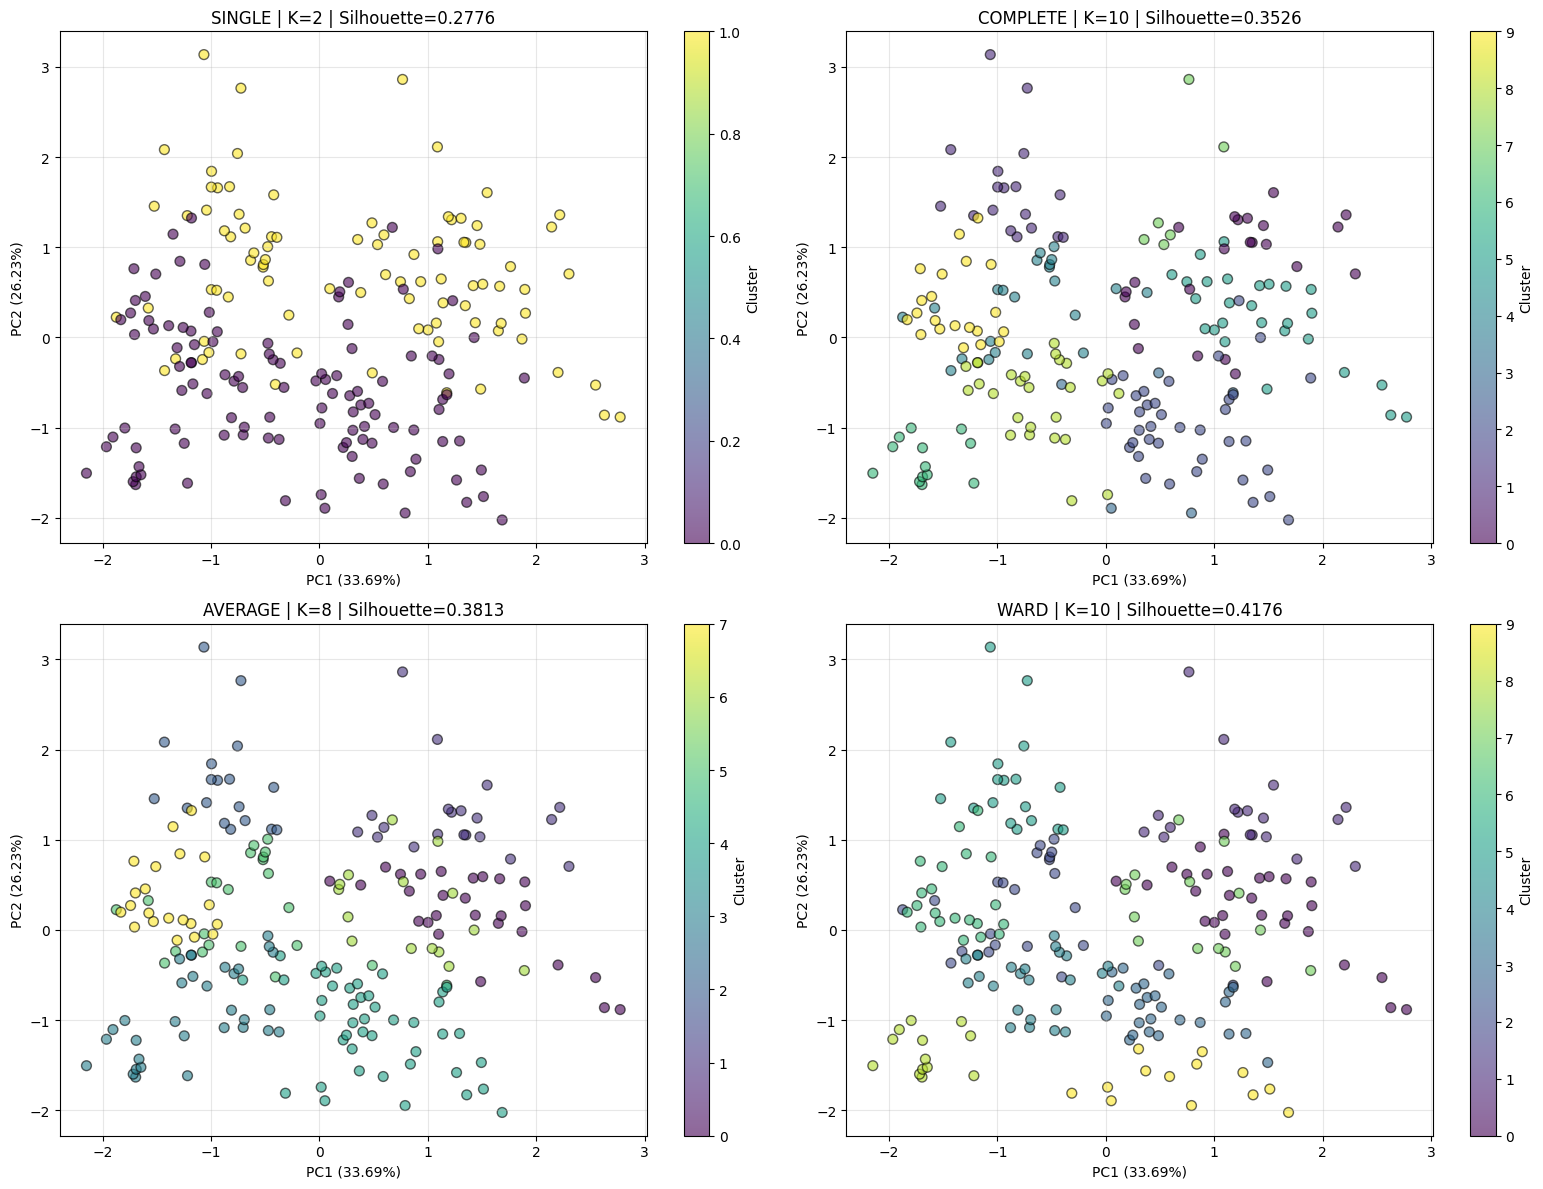

In [74]:
# Display all linkages in PCA space
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, linkage in enumerate(linkages):
    labels = agg_results[linkage]['best_labels']
    n_clusters = agg_results[linkage]['best_n_clusters']
    silhouette = agg_results[linkage]['best_silhouette']
    
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, 
                               cmap='viridis', alpha=0.6, s=50, edgecolor='k')
    
    axes[idx].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    axes[idx].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    axes[idx].set_title(f'{linkage.upper()} | K={n_clusters} | Silhouette={silhouette:.4f}')
    axes[idx].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

plt.tight_layout()
plt.savefig('agglomerative_pca_all.png', dpi=300, bbox_inches='tight')
plt.savefig('agglomerative_pca_all.pdf', bbox_inches='tight')
plt.show()


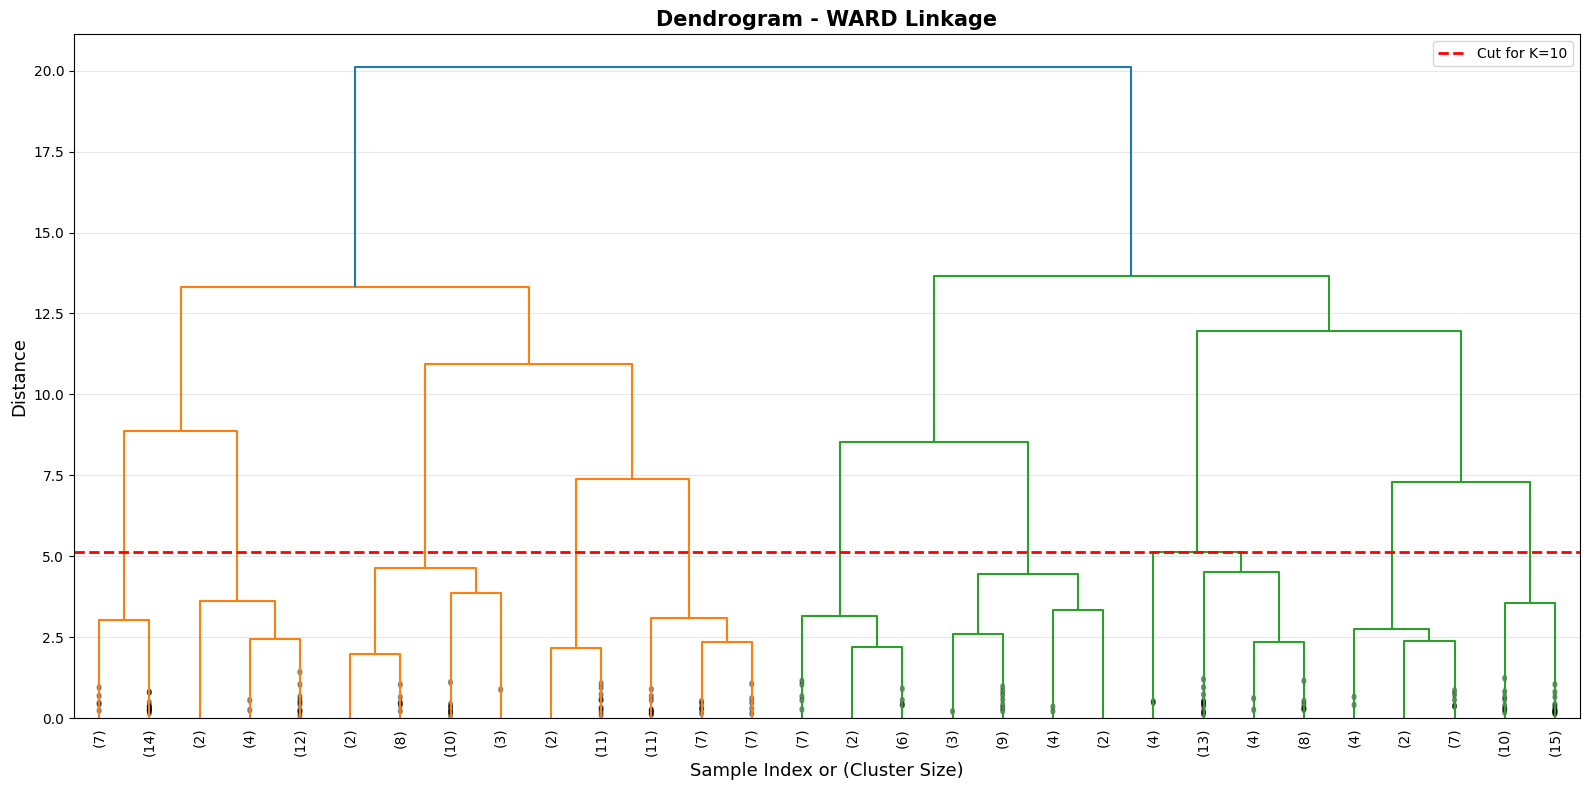

In [75]:
# Display dendrogram for best linkage
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage

plt.figure(figsize=(16, 8))

# Calculate linkage for dendrogram
linkage_matrix = scipy_linkage(X_scaled, method=best_linkage[3])

# Draw a dendrogram
dendrogram(linkage_matrix, 
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)

plt.xlabel('Sample Index or (Cluster Size)', fontsize=13)
plt.ylabel('Distance', fontsize=13)
plt.title(f'Dendrogram - {best_linkage[3].upper()} Linkage', 
          fontsize=15, fontweight='bold')
plt.axhline(y=linkage_matrix[-agg_results[best_linkage[1]]['best_n_clusters'], 2], 
            color='red', linestyle='--', linewidth=2,
            label=f'Cut for K={agg_results[best_linkage[1]]["best_n_clusters"]}')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('dendrogram_best.png', dpi=300, bbox_inches='tight')
plt.savefig('dendrogram_best.pdf', bbox_inches='tight')
plt.show()


## DBSCAN

In [76]:
# Define parameters
epsilon_values = [0.2, 0.4, 0.6, 0.8, 1.0]
min_samples_values = [3, 5, 10]

dbscan_results = []

# Run DBSCAN for all combinations
for eps in epsilon_values:
    for min_samp in min_samples_values:
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        labels = dbscan.fit_predict(X_scaled)
        
        # Calculate criteria
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)
        
        # Calculate Silhouette (only if there are at least 2 clusters)
        if n_clusters >= 2 and n_noise < len(labels):
            # For Silhouette, we remove noise points
            non_noise_mask = labels != -1
            if sum(non_noise_mask) > 0:
                try:
                    silhouette = silhouette_score(X_scaled[non_noise_mask], labels[non_noise_mask])
                except:
                    silhouette = -1
            else:
                silhouette = -1
        else:
            silhouette = -1
        
        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samp,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': noise_ratio,
            'silhouette': silhouette,
            'labels': labels.copy()
        })

        print(f"eps={eps:.1f}, min_samples={min_samp:2d} | "
              f"Clusters: {n_clusters:2d} | "
              f"Noise: {n_noise:3d} ({noise_ratio:6.2%}) | "
              f"Silhouette: {silhouette:7.4f}" if silhouette != -1 else f"Silhouette: {'N/A':>7s}")
        
        
dbscan_df = pd.DataFrame(dbscan_results)

        

eps=0.2, min_samples= 3 | Clusters:  7 | Noise: 179 (89.50%) | Silhouette:  0.7668
Silhouette:     N/A
Silhouette:     N/A
eps=0.4, min_samples= 3 | Clusters: 18 | Noise:  97 (48.50%) | Silhouette:  0.5501
eps=0.4, min_samples= 5 | Clusters:  4 | Noise: 165 (82.50%) | Silhouette:  0.7116
Silhouette:     N/A
eps=0.6, min_samples= 3 | Clusters: 13 | Noise:  26 (13.00%) | Silhouette:  0.3265
eps=0.6, min_samples= 5 | Clusters:  9 | Noise:  62 (31.00%) | Silhouette:  0.3407
eps=0.6, min_samples=10 | Clusters:  3 | Noise: 147 (73.50%) | Silhouette:  0.5992
eps=0.8, min_samples= 3 | Clusters:  4 | Noise:  11 ( 5.50%) | Silhouette:  0.1987
eps=0.8, min_samples= 5 | Clusters:  5 | Noise:  19 ( 9.50%) | Silhouette:  0.2273
eps=0.8, min_samples=10 | Clusters:  4 | Noise:  68 (34.00%) | Silhouette:  0.3193
eps=1.0, min_samples= 3 | Clusters:  3 | Noise:   8 ( 4.00%) | Silhouette:  0.2364
eps=1.0, min_samples= 5 | Clusters:  2 | Noise:  13 ( 6.50%) | Silhouette:  0.2918
eps=1.0, min_samples=10 | C

In [77]:
valid_results = dbscan_df[(dbscan_df['n_clusters'] >= 2) & (dbscan_df['silhouette'] > 0)]

if len(valid_results) > 0:
    # Based on Silhouette
    best_silhouette_idx = valid_results['silhouette'].idxmax()
    best_by_silhouette = dbscan_df.loc[best_silhouette_idx]
    
    print("\nBased on best Silhouette Score:")
    print(f"   eps: {best_by_silhouette['eps']}")
    print(f"   min_samples: {best_by_silhouette['min_samples']}")
    print(f" Number of clusters: {best_by_silhouette['n_clusters']}")
    print(f" Noise count: {best_by_silhouette['n_noise']}")
    print(f" Noise ratio: {best_by_silhouette['noise_ratio']:.2%}")
    print(f"   Silhouette: {best_by_silhouette['silhouette']:.4f}")
    
    # Based on the lowest noise (among results with valid Silhouette)
    best_noise_idx = valid_results['noise_ratio'].idxmin()
    best_by_noise = dbscan_df.loc[best_noise_idx]
    
    print("\nBy lowest noise ratio:")
    print(f" eps: {best_by_noise['eps']}")
    print(f" min_samples: {best_by_noise['min_samples']}")
    print(f" number of clusters: {best_by_noise['n_clusters']}")
    print(f" number of noise: {best_by_noise['n_noise']}")
    print(f" noise ratio: {best_by_noise['noise_ratio']:.2%}")
    print(f" Silhouette: {best_by_noise['silhouette']:.4f}")
    
    # Final selection (combination of Silhouette and Noise ratio)
    # Combined score: High Silhouette and Low Noise
    valid_results_copy = valid_results.copy()
    valid_results_copy['combined_score'] = (
        valid_results_copy['silhouette'] * 0.6 - 
        valid_results_copy['noise_ratio'] * 0.4
    )
    best_combined_idx = valid_results_copy['combined_score'].idxmax()
    best_overall = dbscan_df.loc[best_combined_idx]
    
    print("\nBest overall setting (combination of Silhouette and Noise):")
    print(f" eps: {best_overall['eps']}")
    print(f" min_samples: {best_overall['min_samples']}")
    print(f" number of clusters: {best_overall['n_clusters']}")
    print(f" number of noise: {best_overall['n_noise']}")
    print(f" noise ratio: {best_overall['noise_ratio']:.2%}")
    print(f" Silhouette: {best_overall['silhouette']:.4f}")




Based on best Silhouette Score:
   eps: 0.2
   min_samples: 3
 Number of clusters: 7
 Noise count: 179
 Noise ratio: 89.50%
   Silhouette: 0.7668

By lowest noise ratio:
 eps: 1.0
 min_samples: 3
 number of clusters: 3
 number of noise: 8
 noise ratio: 4.00%
 Silhouette: 0.2364

Best overall setting (combination of Silhouette and Noise):
 eps: 1.0
 min_samples: 5
 number of clusters: 2
 number of noise: 13
 noise ratio: 6.50%
 Silhouette: 0.2918


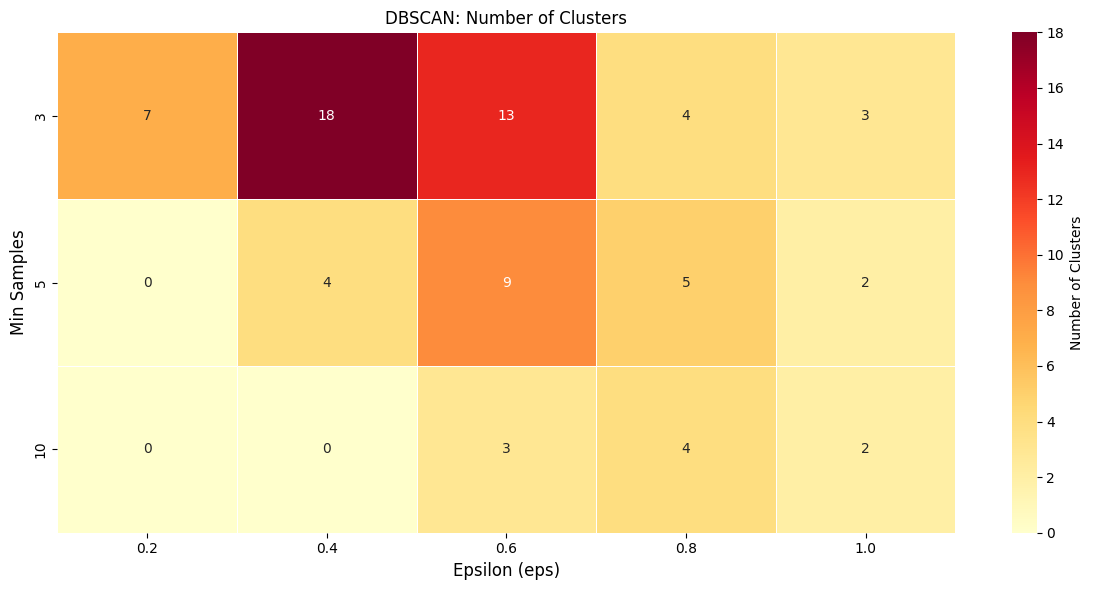

In [78]:
# Cluster count chart for different combinations
pivot_clusters = dbscan_df.pivot(index='min_samples', columns='eps', values='n_clusters')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_clusters, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Clusters'}, linewidths=0.5)
plt.title('DBSCAN: Number of Clusters')
plt.xlabel('Epsilon (eps)', fontsize=12)
plt.ylabel('Min Samples', fontsize=12)
plt.tight_layout()
plt.savefig('dbscan_clusters_heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('dbscan_clusters_heatmap.pdf', bbox_inches='tight')
plt.show()


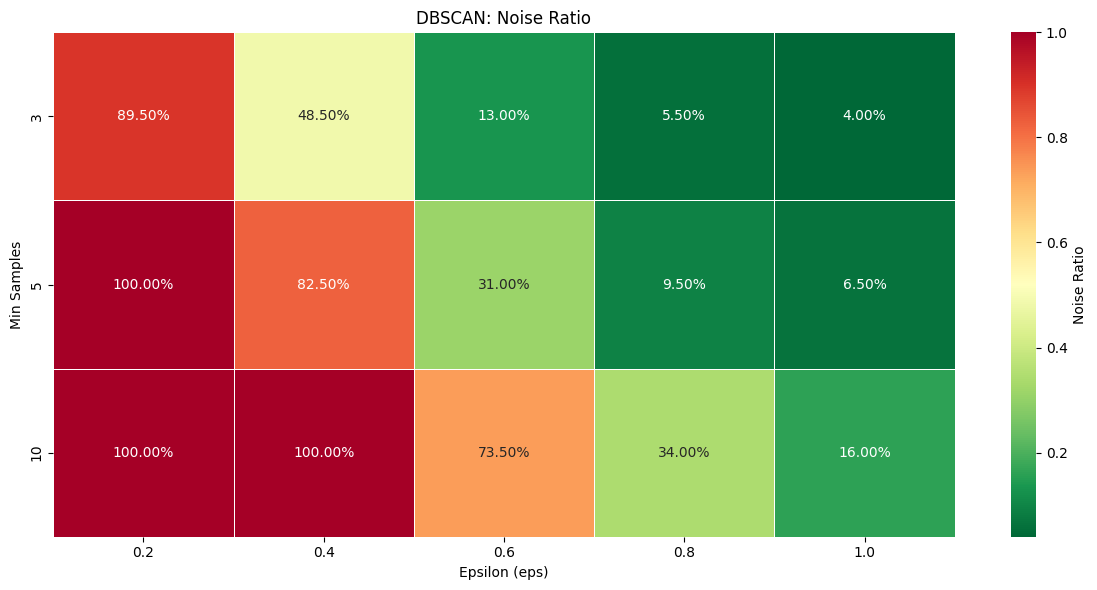

In [79]:
# Noise ratio chart
pivot_noise = dbscan_df.pivot(index='min_samples', columns='eps', values='noise_ratio')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_noise, annot=True, fmt='.2%', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Noise Ratio'}, linewidths=0.5)
plt.title('DBSCAN: Noise Ratio')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Min Samples')
plt.tight_layout()
plt.savefig('dbscan_noise_heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('dbscan_noise_heatmap.pdf', bbox_inches='tight')
plt.show()


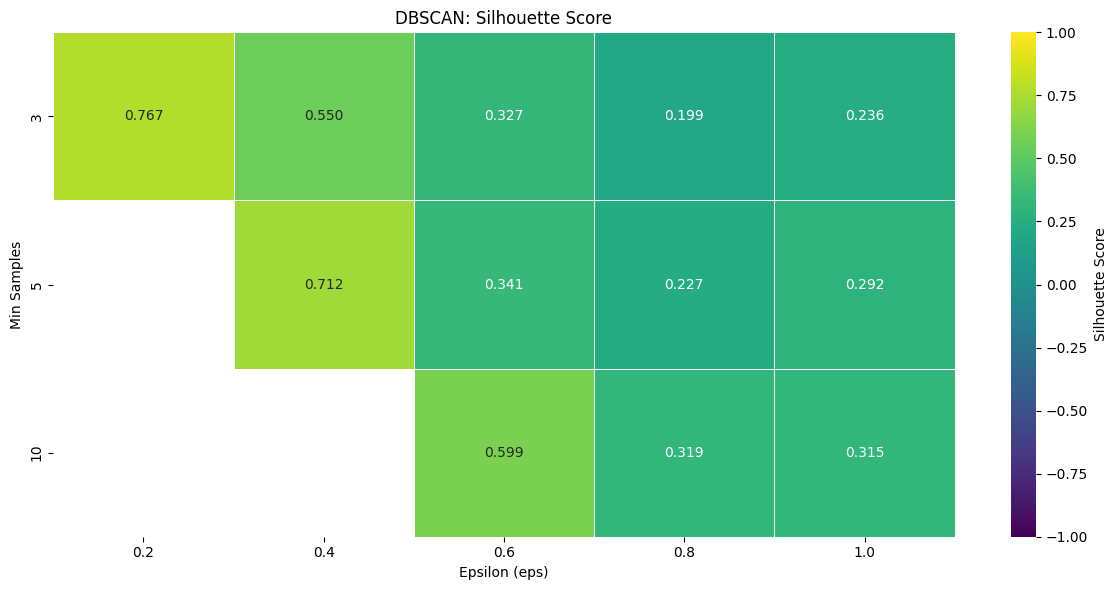

In [80]:
# Silhouette Score Chart
pivot_silhouette = dbscan_df.pivot(index='min_samples', columns='eps', values='silhouette')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_silhouette, annot=True, fmt='.3f', cmap='viridis', 
            cbar_kws={'label': 'Silhouette Score'}, linewidths=0.5, 
            vmin=-1, vmax=1, mask=pivot_silhouette < 0)
plt.title('DBSCAN: Silhouette Score')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Min Samples')
plt.tight_layout()
plt.savefig('dbscan_silhouette_heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('dbscan_silhouette_heatmap.pdf', bbox_inches='tight')
plt.show()


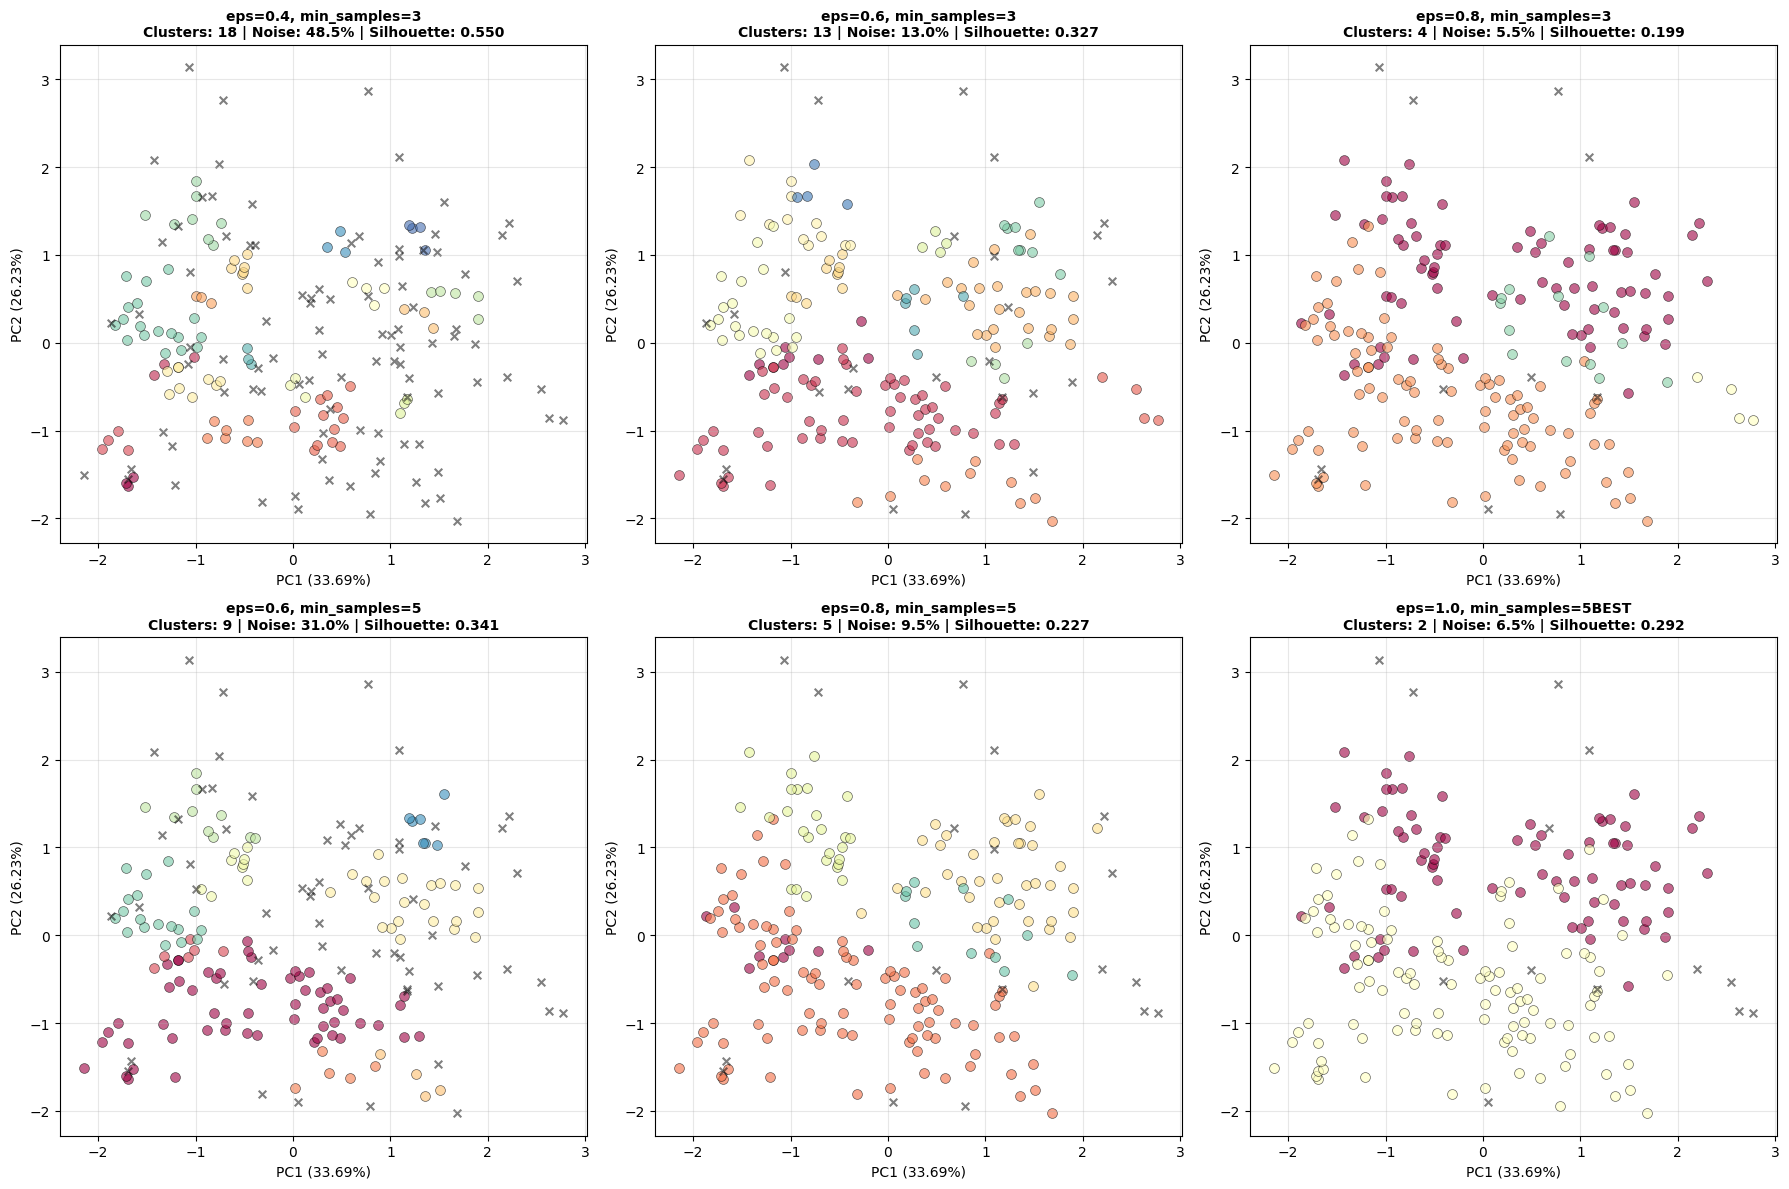

In [81]:
# Display multiple salient modes in PCA space
if best_overall is not None:
    selected_configs = [
        {'eps': 0.4, 'min_samples': 3},
        {'eps': 0.6, 'min_samples': 3},
        {'eps': 0.8, 'min_samples': 3},
        {'eps': 0.6, 'min_samples': 5},
        {'eps': 0.8, 'min_samples': 5},
        {'eps': best_overall['eps'], 'min_samples': best_overall['min_samples']}
    ]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for idx, config in enumerate(selected_configs):
        result = dbscan_df[
            (dbscan_df['eps'] == config['eps']) & 
            (dbscan_df['min_samples'] == config['min_samples'])
        ].iloc[0]
        
        labels = result['labels']
        
        # رنگ‌بندی: نویز را مشکی نشان می‌دهیم
        unique_labels = set(labels)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        
        for label, color in zip(unique_labels, colors):
            if label == -1:
                # نقاط نویز
                mask = labels == label
                axes[idx].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                                c='black', marker='x', s=30, alpha=0.5, label='Noise')
            else:
                # نقاط خوشه
                mask = labels == label
                axes[idx].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                                c=[color], s=50, alpha=0.6, edgecolor='k', linewidth=0.5)
        

        title = f"eps={config['eps']}, min_samples={config['min_samples']}"
        if config['eps'] == best_overall['eps'] and config['min_samples'] == best_overall['min_samples']:
            title += "BEST"
        
        axes[idx].set_title(
            f"{title}\n"
            f"Clusters: {result['n_clusters']} | "
            f"Noise: {result['noise_ratio']:.1%} | "
            f"Silhouette: {result['silhouette']:.3f}" if result['silhouette'] > 0 else f"Silhouette: N/A",
            fontsize=10, fontweight='bold'
        )
        axes[idx].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
        axes[idx].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('dbscan_pca_comparison.png', dpi=300, bbox_inches='tight')
    plt.savefig('dbscan_pca_comparison.pdf', bbox_inches='tight')
    plt.show()


## Comparison and general analysis in PCA space

In [82]:
# Preparing data for the best models
best_models = {
    'KMeans': {
        'labels': None,
        'k': None,
        'silhouette': None,
        'params': None
    },
    'Agglomerative': {
        'labels': None,
        'k': None,
        'silhouette': None,
        'params': None
    },
    'DBSCAN': {
        'labels': None,
        'k': None,
        'silhouette': None,
        'params': None
    }
}

# KMeans
kmeans_best = KMeans(n_clusters=best_k, random_state=33, n_init=10)
kmeans_labels = kmeans_best.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

best_models['KMeans']['labels'] = kmeans_labels
best_models['KMeans']['k'] = best_k
best_models['KMeans']['silhouette'] = kmeans_silhouette
best_models['KMeans']['params'] = f"K={best_k}"

print(f"\n KMeans - Best Model:")
print(f" Number of Clusters (K): {best_k}")
print(f" Silhouette Score: {kmeans_silhouette:.4f}")

# Agglomerative
agg_best = AgglomerativeClustering(
    n_clusters=10, 
    linkage='ward'
)
agg_labels = agg_best.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, agg_labels)

best_models['Agglomerative']['labels'] = agg_labels
best_models['Agglomerative']['k'] = 10
best_models['Agglomerative']['silhouette'] = agg_silhouette
best_models['Agglomerative']['params'] = f"K={10}, linkage={'ward'}"

print(f"\n Agglomerative - Best Model:")
print(f" Number of Clusters (K): {10}")
print(f" Linkage: {'ward'}")
print(f" Silhouette Score: {agg_silhouette:.4f}")

# DBSCAN
if best_overall is not None:
    dbscan_best = DBSCAN(eps=best_overall['eps'], min_samples=best_overall['min_samples'])
    dbscan_labels = dbscan_best.fit_predict(X_scaled)
    

    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_dbscan = list(dbscan_labels).count(-1)
    noise_ratio_dbscan = n_noise_dbscan / len(dbscan_labels)

    if n_clusters_dbscan >= 2 and n_noise_dbscan < len(dbscan_labels):
        non_noise_mask = dbscan_labels != -1
        dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
    else:
        dbscan_silhouette = -1
    
    best_models['DBSCAN']['labels'] = dbscan_labels
    best_models['DBSCAN']['k'] = n_clusters_dbscan
    best_models['DBSCAN']['silhouette'] = dbscan_silhouette
    best_models['DBSCAN']['params'] = f"eps={best_overall['eps']}, min_samples={best_overall['min_samples']}"
    
    print(f"\n DBSCAN - Best Model:")
    print(f" Number of Clusters: {n_clusters_dbscan}")
    print(f" Epsilon: {best_overall['eps']}")
    print(f" Min Samples: {best_overall['min_samples']}")
    print(f" Noise Score: {n_noise_dbscan} ({noise_ratio_dbscan:.2%})")
    print(f" Silhouette Score: {dbscan_silhouette:.4f}")



 KMeans - Best Model:
 Number of Clusters (K): 10
 Silhouette Score: 0.4208

 Agglomerative - Best Model:
 Number of Clusters (K): 10
 Linkage: ward
 Silhouette Score: 0.4176

 DBSCAN - Best Model:
 Number of Clusters: 2
 Epsilon: 1.0
 Min Samples: 5
 Noise Score: 13 (6.50%)
 Silhouette Score: 0.2918


In [83]:
# Cluster distribution analysis
for algo_name, model_info in best_models.items():
    if model_info['labels'] is not None:
        labels = model_info['labels']
        unique, counts = np.unique(labels, return_counts=True)
        
        print(f" {algo_name}:")
        for label, count in zip(unique, counts):
            if label == -1:
                print(f"   Noise: {count} Point ({count/len(labels)*100:.1f}%)")
            else:
                print(f"   Cluster {label}: {count} Point ({count/len(labels)*100:.1f}%)")


 KMeans:
   Cluster 0: 26 Point (13.0%)
   Cluster 1: 25 Point (12.5%)
   Cluster 2: 18 Point (9.0%)
   Cluster 3: 14 Point (7.0%)
   Cluster 4: 21 Point (10.5%)
   Cluster 5: 19 Point (9.5%)
   Cluster 6: 24 Point (12.0%)
   Cluster 7: 13 Point (6.5%)
   Cluster 8: 26 Point (13.0%)
   Cluster 9: 14 Point (7.0%)
 Agglomerative:
   Cluster 0: 29 Point (14.5%)
   Cluster 1: 18 Point (9.0%)
   Cluster 2: 23 Point (11.5%)
   Cluster 3: 25 Point (12.5%)
   Cluster 4: 25 Point (12.5%)
   Cluster 5: 18 Point (9.0%)
   Cluster 6: 21 Point (10.5%)
   Cluster 7: 15 Point (7.5%)
   Cluster 8: 13 Point (6.5%)
   Cluster 9: 13 Point (6.5%)
 DBSCAN:
   Noise: 13 Point (6.5%)
   Cluster 0: 77 Point (38.5%)
   Cluster 1: 110 Point (55.0%)


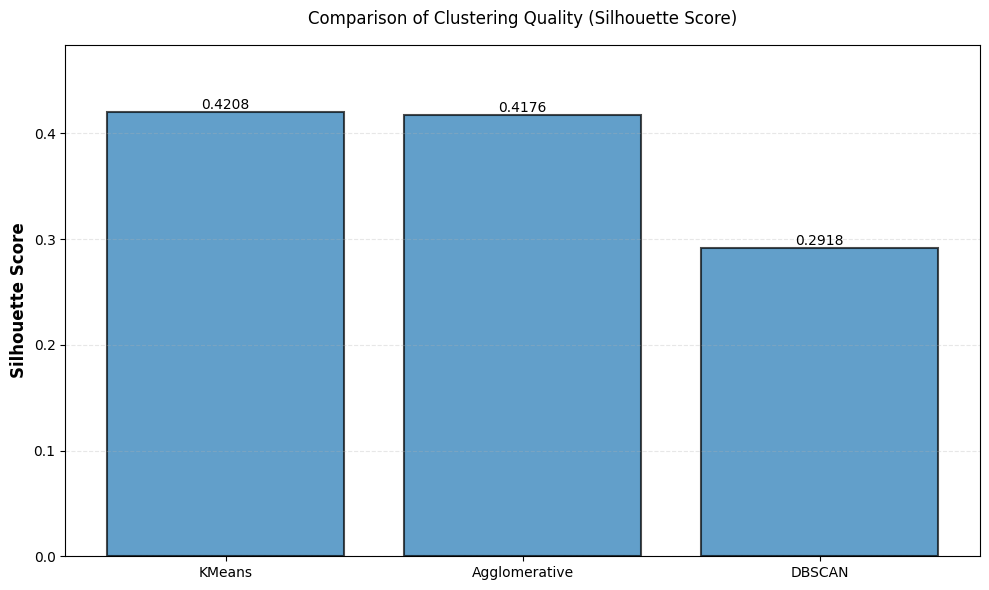

In [84]:
# Silhouette Score comparison bar chart
fig, ax = plt.subplots(figsize=(10, 6))

algorithms = []
silhouette_scores = []

for algo_name, model_info in best_models.items():
    if model_info['silhouette'] is not None and model_info['silhouette'] > 0:
        algorithms.append(algo_name)
        silhouette_scores.append(model_info['silhouette'])

bars = ax.bar(algorithms, silhouette_scores, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add values ​​to bars
for bar, score in zip(bars, silhouette_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}',
            ha='center', va='bottom')

ax.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax.set_title('Comparison of Clustering Quality (Silhouette Score)', pad=15)
ax.set_ylim(0, max(silhouette_scores) * 1.15)
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('silhouette_comparison_bar.png', dpi=300, bbox_inches='tight')
plt.savefig('silhouette_comparison_bar.pdf', bbox_inches='tight')
plt.show()


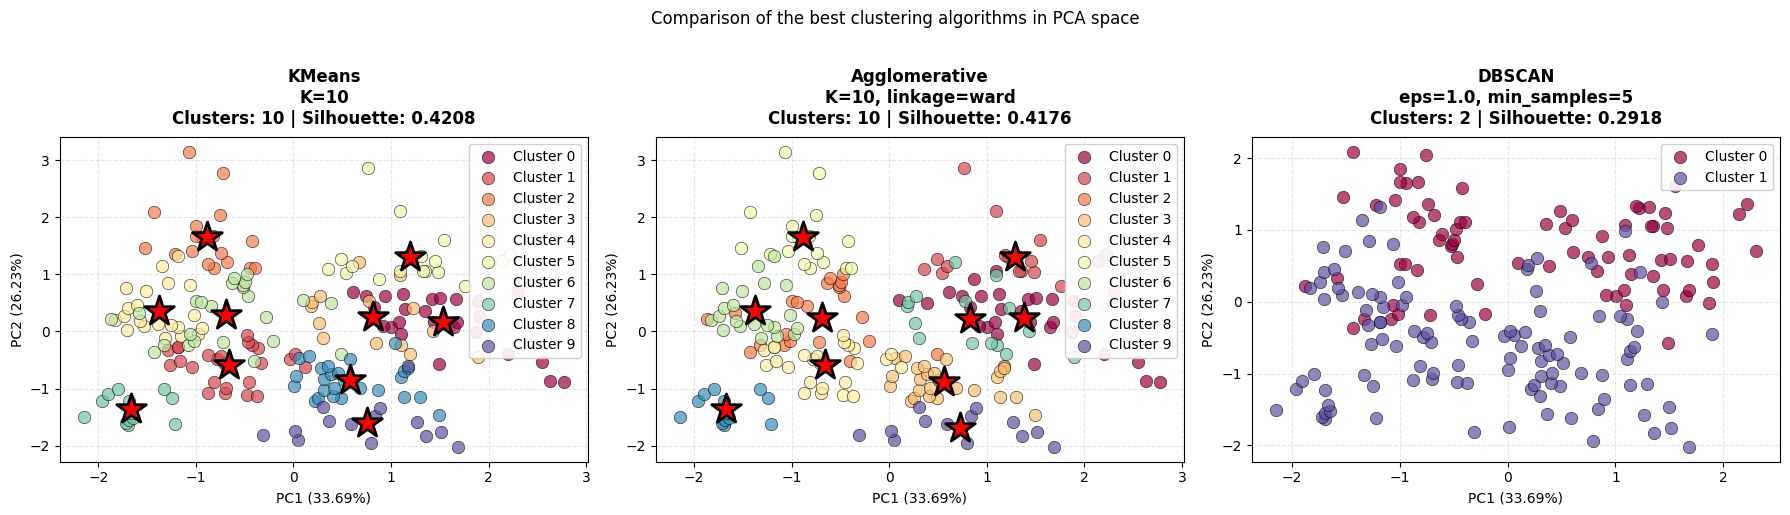

In [85]:

n_algorithms = len(best_models)
fig, axes = plt.subplots(1, n_algorithms, figsize=(6*n_algorithms, 5))

if n_algorithms == 1:
    axes = [axes]

for idx, (algo_name, result) in enumerate(best_models.items()):
    labels = result['labels']
    n_clusters = result['k']
    

    unique_labels = set(labels)
    if -1 in unique_labels:
        unique_labels.remove(-1)
    

    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    

    for label_idx, (label, color) in enumerate(zip(sorted(unique_labels), colors)):
        if label == -1:
            mask = labels == label
            axes[idx].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                            c='black', marker='x', s=50, alpha=0.5, 
                            label='Noise', edgecolor='k', linewidth=0.5)
        else:
            mask = labels == label
            axes[idx].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                            c=[color], s=80, alpha=0.7, 
                            label=f'Cluster {label}', edgecolor='k', linewidth=0.5)
    
 
    if algo_name in ['KMeans', 'Agglomerative']:
        for label in sorted(unique_labels):
            mask = labels == label
            center = X_pca[mask].mean(axis=0)
            axes[idx].scatter(center[0], center[1], 
                            c='red', marker='*', s=500, 
                            edgecolor='black', linewidth=2, zorder=10)
    

    axes[idx].set_title(
        f"{algo_name}\n{result['params']}\n"
        f"Clusters: {n_clusters} | Silhouette: {result['silhouette']:.4f}",
        fontsize=12, fontweight='bold', pad=10
    )
    axes[idx].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
    axes[idx].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
    axes[idx].grid(True, alpha=0.3, linestyle='--')
    axes[idx].legend(loc='best', framealpha=0.9)

plt.suptitle('Comparison of the best clustering algorithms in PCA space', y=1.02)
plt.tight_layout()
plt.savefig('final_comparison_pca.png', dpi=300, bbox_inches='tight')
plt.savefig('final_comparison_pca.pdf', bbox_inches='tight')
plt.show()